<a href="https://colab.research.google.com/github/hardiksharma6555/MLP_code/blob/main/Week4_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.datasets import fetch_california_housing

In [23]:
california_housing = fetch_california_housing(as_frame = True)

In [24]:
type(california_housing)

sklearn.utils.Bunch

In [25]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

#Step2: Shape of Feature Matrix

In [26]:
california_housing.data.shape

(20640, 8)

In [27]:
type(california_housing.data)

pandas.core.frame.DataFrame

#Step3: Shape of label

In [28]:
california_housing.target.shape

(20640,)

In [29]:
type(california_housing.target)

pandas.core.series.Series

#Step4: Feature Names

In [30]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [31]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#Step6: Examine Features

In [32]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
california_housing.frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


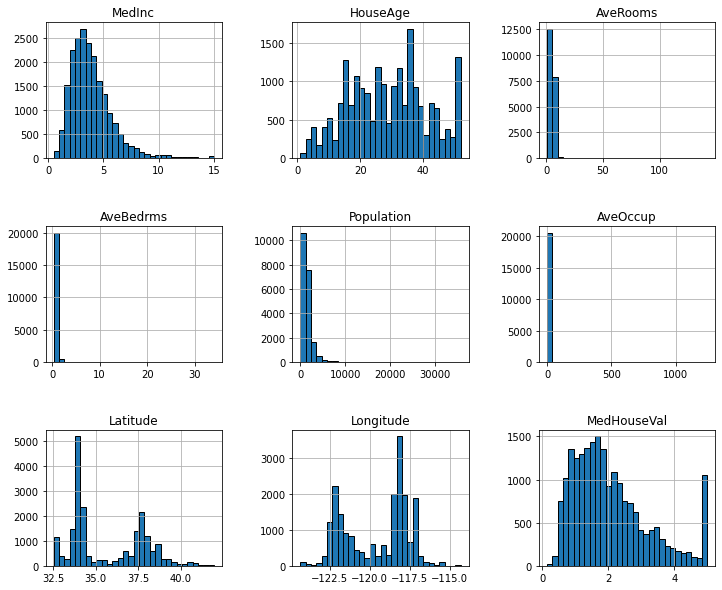

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

#HOUSE PREDICTION DATASET

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

import warnings 
warnings.filterwarnings('ignore')

In [36]:
np.random.seed(306)

In [37]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)


In [38]:
# Fetching dataset
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

# train-test-split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

# train --> train + dev split
train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)

In [39]:
lin_reg_pipeline = Pipeline([
    ("feature_scaling", StandardScaler()),
    ("lin_reg", LinearRegression())
])


lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

lin_reg_train_error = -1 * lin_reg_cv_results['train_score']
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']


print(f"Mean absolute error of linear regression model on the train set:\n" f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")

print()
print(f"Mean absolute error of linear regression model on the test set:\n" f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.530 +/- 0.002

Mean absolute error of linear regression model on the test set:
0.527 +/- 0.008


In [40]:
sgd_reg_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('sgd_reg', SGDRegressor(max_iter=np.ceil(1e6/com_train_features.shape[0]),
                            early_stopping=True,
                            eta0=1e-4,
                            learning_rate='constant',
                            tol=1e-5,
                            validation_fraction=0.1,
                            n_iter_no_change=5,
                            average=10,
                            random_state=42))
])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,  # shufflesplit declared above
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True)

sgd_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_test_error = -1 * sgd_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n" f"{sgd_train_error.mean():.3f} +/- {sgd_train_error.std():.3f}")

print(f"Mean absolute error of SGD regression model on the test set:\n" f"{sgd_test_error.mean():.3f} +/- {sgd_test_error.std():.3f}")

Mean absolute error of SGD regression model on the train set:
0.564 +/- 0.023
Mean absolute error of SGD regression model on the test set:
0.561 +/- 0.025


In [41]:

class uniform_int:
    """ 
    Integer valued version of the uniform distributions
    """

    def __init__(self, a, b):
        self._distribution = uniform(a, b)

    def rvs(self, *args, **kwargs):
        """ Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)